In [1]:
from helper_functions import extract_pdf_text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

seed=25 #for random state / reproducibility

c:\Users\ekabu\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("ai_ml_papers.csv")
df.head()

C:\Users\ekabu\AppData\Local\Temp\ipykernel_944\782077482.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ai_ml_papers.csv")


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,704.0047,Igor Grabec,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,"5 pages, 5 eps figures, uses IEEEtran.cls",NaN,NaN,NaN,cs.NE cs.AI,NaN,The intelligent acoustic emission locator is...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2009-09-29,"[['Kosel', 'T.', ''], ['Grabec', 'I.', '']]"
1,704.005,Igor Grabec,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,"5 pages, 7 eps figures, uses IEEEtran.cls",NaN,NaN,NaN,cs.NE cs.AI,NaN,Part I describes an intelligent acoustic emi...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2007-05-23,"[['Kosel', 'T.', ''], ['Grabec', 'I.', '']]"
2,704.0304,Carlos Gershenson,Carlos Gershenson,The World as Evolving Information,"16 pages. Extended version, three more laws of...","Minai, A., Braha, D., and Bar-Yam, Y., eds. Un...",10.1007/978-3-642-18003-3_10,NaN,cs.IT cs.AI math.IT q-bio.PE,http://arxiv.org/licenses/nonexclusive-distrib...,This paper discusses the benefits of describ...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...",2013-04-05,"[['Gershenson', 'Carlos', '']]"
3,704.0671,Maxim Raginsky,Maxim Raginsky,Learning from compressed observations,6 pages; submitted to the 2007 IEEE Informatio...,NaN,10.1109/ITW.2007.4313111,NaN,cs.IT cs.LG math.IT,NaN,The problem of statistical learning is to co...,"[{'version': 'v1', 'created': 'Thu, 5 Apr 2007...",2016-11-15,"[['Raginsky', 'Maxim', '']]"
4,704.0954,Jos\'e M. F. Moura,Soummya Kar and Jose M. F. Moura,Sensor Networks with Random Links: Topology De...,Submitted to IEEE Transactions,NaN,10.1109/TSP.2008.920143,NaN,cs.IT cs.LG math.IT,NaN,"In a sensor network, in practice, the commun...","[{'version': 'v1', 'created': 'Fri, 6 Apr 2007...",2009-11-13,"[['Kar', 'Soummya', ''], ['Moura', 'Jose M. F...."


In [3]:
df.describe()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
count,266252.0000,266148,266252,266252,154058,26772,34690,4066,266252,264663,266252,266252,266252,266252
unique,266252.0000,111092,246297,266081,105605,24614,34623,3998,18333,9,266163,265853,4321,241999
top,704.0047,EPTCS,Marcus Hutter,Discussion: Latent variable graphical model se...,10 pages,NeurIPS 2020,10.1145/1122445.1122456,SWAT4LS 2010,cs.LG,http://arxiv.org/licenses/nonexclusive-distrib...,"Discussion of ""Latent variable graphical mod...","[{'version': 'v1', 'created': 'Wed, 27 Jun 201...",2007-05-23,"[['Hutter', 'Marcus', '']]"
freq,1.0000,376,41,4,578,29,6,15,20413,160918,4,102,1038,41


There are a total of 266,252 papers, filtered to ML and AI related papers. There is no missing data for critical entries such as ids, authors, title and abstracts.

Let us sample the full-text pdf from some papers and proceed with EDA.

In [16]:
n_sample = 50

df_sample = df.sample(n=n_sample, random_state=seed)
#extract and append full-text
df_sample['full_text'] = df_sample['id'].apply(extract_pdf_text)

print(df_sample[['id','full_text']].head(5))

                id                                          full_text
91709   2101.10007  Adaptive Scheduling for Machine Learning Tasks...
89614   2012.12109  Enhance Convolutional Neural Networks with Noi...
108316  2107.11481  Similarity Based Label Smoothing For Dialogue ...
36393   1811.00739  An Empirical Exploration of Curriculum Learnin...
131454  2204.02389  OBJECTFOLDER 2.0: A Multisensory Object Datase...


In [17]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ekabu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ekabu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\ekabu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


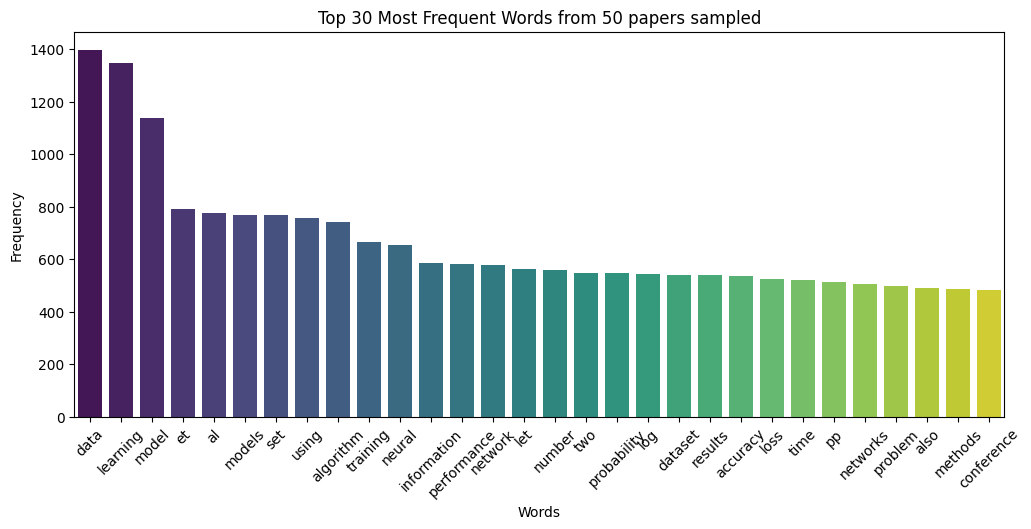

In [18]:
#Text normalization
nltk.download('punkt')
import re

df_sample['tokens'] = df_sample['full_text'].str.lower() #lower case
df_sample['tokens'] = df_sample['tokens'].apply(lambda x: re.sub(r'[^a-z\s]', '', x)) #remove symbols (non-words and non-whitespce)
df_sample['tokens'] = df_sample['tokens'].apply(lambda x: re.sub(r'\b[a-z0-9]\b', '', x)) # removes single letters/numbers, part of formula
df_sample['tokens'] = df_sample['tokens'].apply(word_tokenize) #tokenize
df_sample['tokens'] = df_sample['tokens'].apply(lambda words: [word for word in words if word not in stop_words]) #remove stop words


#Flatten the token lists into a single list of words
all_words = sum(df_sample['tokens'].dropna(), [])

# Count word frequencies
freq = 30
word_counts = Counter(all_words)
top_words = word_counts.most_common(freq)

# Unpack words and counts for plotting
words, counts = zip(*top_words)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title(f"Top {freq} Most Frequent Words from {n_sample} papers sampled")
plt.show()

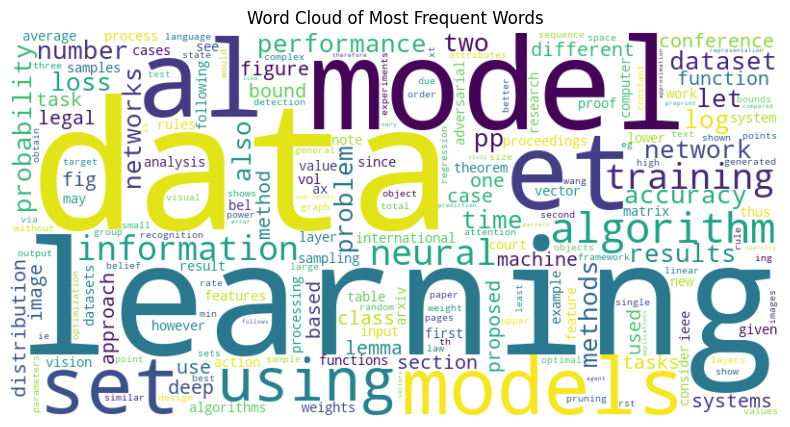

In [19]:
from wordcloud import WordCloud

# Generate a word cloud from the word list
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Frequent Words")
plt.show()